In [1]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'] ,encoding= "ISO-8859-1")
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'], )
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'])

In [3]:
movies.head(2)

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [4]:
ratings.head(2)

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [5]:
users.head(2)

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [6]:
display('movies',movies.shape,'rating', ratings.shape,'users', users.shape)

'movies'

(3883, 3)

'rating'

(1000209, 4)

'users'

(6040, 5)

In [7]:
df = users.drop('zip_code', axis =1).merge(ratings.drop('timestamp' , axis =1) , on = 'userid')
df.head()

,userid,gender,age,occupation,movieid,rating
0,1,F,1,10,1193,5
1,1,F,1,10,661,3
2,1,F,1,10,914,3
3,1,F,1,10,3408,4
4,1,F,1,10,2355,5


In [8]:
master_data = movies.merge(df , on = 'movieid')
master_data.head()

,movieid,title,genres,userid,gender,age,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,4
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,5


# User age distribution

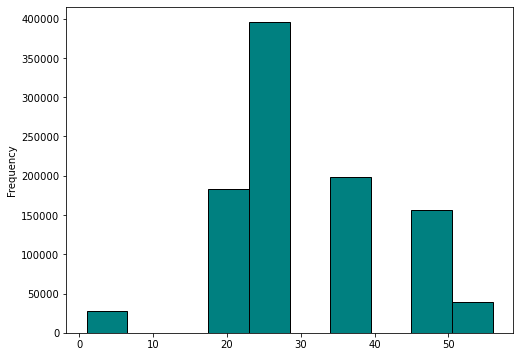

In [9]:
plt.figure(figsize=(8,6))
master_data['age'].plot.hist( color ='teal', edgecolor = 'black');

# User rating of the movie “Toy Story”

In [10]:
toy_story = master_data[master_data['title'].str.contains('Toy Story', regex = False)]

In [11]:
display(toy_story.head(),toy_story.tail())

,movieid,title,genres,userid,gender,age,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,4
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,5


,movieid,title,genres,userid,gender,age,occupation,rating
838274,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6022,M,25,17,5
838275,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6024,M,25,12,4
838276,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6027,M,18,4,4
838277,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6036,F,25,15,4
838278,3114,Toy Story 2 (1999),Animation|Children's|Comedy,6037,F,45,1,4


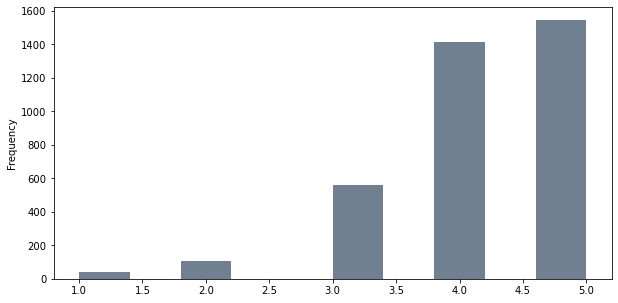

In [12]:
plt.figure(figsize = (10,5))
toy_story['rating'].plot.hist(color = 'slategray');

In [13]:
top_25 = master_data.groupby(["movieid", "title"]).mean().sort_values('rating', ascending=False)
top_25.drop(['age','occupation','userid'] , axis = 1).reset_index().head(25)

,movieid,title,rating
0,989,Schlafes Bruder (Brother of Sleep) (1995),5.000000
1,3881,Bittersweet Motel (2000),5.000000
2,1830,Follow the Bitch (1998),5.000000
3,3382,Song of Freedom (1936),5.000000
4,787,"Gate of Heavenly Peace, The (1995)",5.000000
5,3280,"Baby, The (1973)",5.000000
6,3607,One Little Indian (1973),5.000000
7,3233,Smashing Time (1967),5.000000
8,3172,Ulysses (Ulisse) (1954),5.000000
9,3656,Lured (1947),5.000000


# ratings for all the movies reviewed by a particular user of user id = 2696

In [14]:
df1 = master_data[master_data['userid']==2696]
df1.head()

,movieid,title,genres,userid,gender,age,occupation,rating
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,M,25,7,3
200536,800,Lone Star (1996),Drama|Mystery,2696,M,25,7,5
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,M,25,7,4
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,M,25,7,3
349333,1258,"Shining, The (1980)",Horror,2696,M,25,7,4


In [15]:
df1.shape

(20, 8)

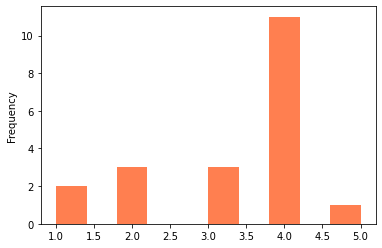

In [16]:
df1['rating'].plot.hist(color = 'coral');

In [17]:
master_data.head()

,movieid,title,genres,userid,gender,age,occupation,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,5
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,4
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,4
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,5
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,5


In [18]:
master_data['genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [19]:
movies['new_genres'] = movies['genres'].apply(lambda x : x.split('|'))
movies.head()

,movieid,title,genres,new_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


# All unique genres

In [20]:
genres = []
for i in movies['new_genres']:
    genres.extend(i)
    
genres = set(genres)
print(list(genres))

['Musical', 'Western', 'Film-Noir', 'Thriller', 'Animation', 'Adventure', 'Crime', 'War', 'Horror', 'Romance', 'Drama', 'Sci-Fi', 'Action', 'Documentary', 'Mystery', 'Fantasy', "Children's", 'Comedy']


# Creating a separate column for each genre category with a one-hot encoding

In [21]:
new_data = master_data.copy()

In [22]:
for i in genres:
    new_data[i] = master_data['genres'].apply(lambda x: 1 if i in x else 0)
new_data.head()

,movieid,title,genres,userid,gender,age,occupation,rating,Musical,Western,Film-Noir,Thriller,Animation,Adventure,Crime,War,Horror,Romance,Drama,Sci-Fi,Action,Documentary,Mystery,Fantasy,Children's,Comedy
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1


# the features affecting the ratings of any particular movie.

In [23]:
new_data.drop(['movieid','userid','age','occupation'] , axis =1).corr()[['rating']].sort_values('rating', ascending = False).T

,rating,Drama,War,Film-Noir,Crime,Documentary,Animation,Mystery,Musical,Romance,Western,Thriller,Fantasy,Adventure,Comedy,Children's,Sci-Fi,Action,Horror
rating,1.0,0.122561,0.075688,0.060259,0.033446,0.028098,0.01967,0.015848,0.015643,0.009644,0.007311,-0.004806,-0.023312,-0.036718,-0.039622,-0.039829,-0.044487,-0.047633,-0.094353


In [24]:
new_data.columns

Index(['movieid', 'title', 'genres', 'userid', 'gender', 'age', 'occupation',
       'rating', 'Musical', 'Western', 'Film-Noir', 'Thriller', 'Animation',
       'Adventure', 'Crime', 'War', 'Horror', 'Romance', 'Drama', 'Sci-Fi',
       'Action', 'Documentary', 'Mystery', 'Fantasy', 'Children's', 'Comedy'],
      dtype='object')

# model to predict the movie ratings

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
x = new_data[[ 'age', 'Romance', 'Comedy', 'Western', 'Crime', 'Film-Noir',
       'Adventure', 'Drama', 'War', 'Mystery', 'Sci-Fi', "Children's",
       'Thriller', 'Animation', 'Horror', 'Musical', 'Documentary', 'Action',
       'Fantasy']]
y = new_data['rating']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
model.predict(x_test)

array([3.82817943, 3.99697862, 4.05684843, ..., 3.56944876, 3.24180927,
       3.53744508])